# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

## Importing the data

In [1]:
# use these links to do so:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\Lenovo\\Downloads'

In [2]:
data=pd.read_csv("Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Removing Irrelevant data

In [3]:
# To drop the Customer ID as that doesn't affect the final prediction.
data=data.drop('customerID',axis=1)

## Understanding the data

In [4]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# To check if a given cell value is nan.
data[data.iloc[:,:]==' '] = np.NaN

D:\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
# Change the Total Charges to float type from object type.
data['TotalCharges'] = data['TotalCharges'].astype(float)

# Return the number of missing values in each columns.
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Fill the missing value with the mean of that column.
data=data.fillna(data.mean())

data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Visualization

### Customer Gender Distribution

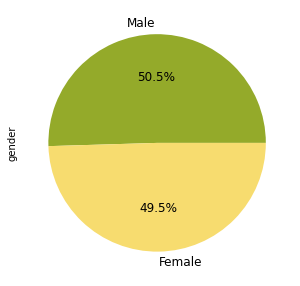

In [8]:
# Changes the figure size and colour.
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['#94aa2a','#F7DC6F']

# Plot the distribution of Gender of Customer.
ax = (data['gender'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12,colors = colors )

### Distribution of services and customers are availing

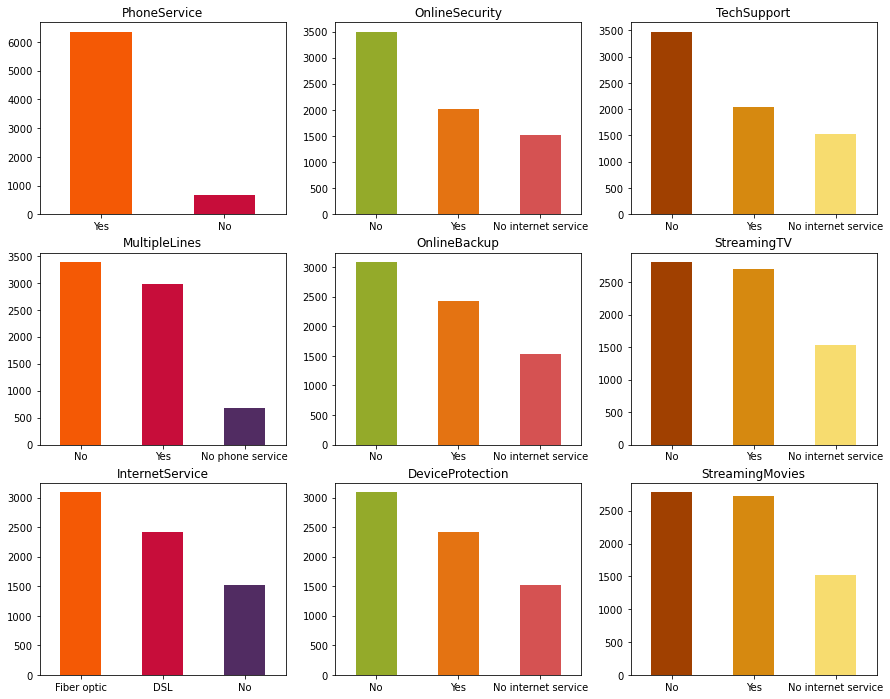

In [9]:
# Select the features(services) and colour whose distribution is plotted.
features = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
colors1 =['#f45905','#c70d3a','#512c62']
colors2 =['#94aa2a','#e47312','#d55252']
colors3= ['#A04000','#D68910','#F7DC6F']

# Plot the distribution of given features of Customer by 3X3.
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(features):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color=colors1)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color = colors2)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=colors3)
    ax.set_title(item)

### Distrimution of churn rate

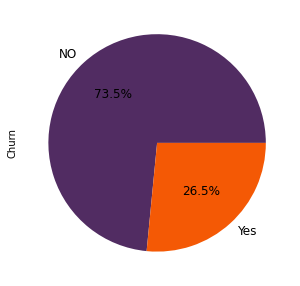

In [10]:
# Changes the figure size and colour.
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['#512c62','#f45905']

# Plot the distribution of the churn rate.
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['NO', 'Yes'],figsize =(5,5), fontsize = 12,colors = colors )

### Churn vs Monthly Charges distribution

Text(0.5, 1.0, 'churn vs monthly charges distribution')

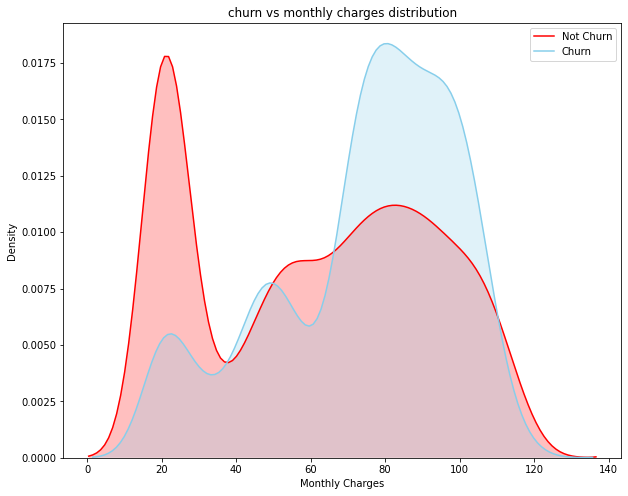

In [11]:
# Set the dimensions and plotsize.
dims = (10, 8)
ax = plt.subplots(figsize=dims)

# Use Seaborn kernel density estimate to plot the chart.
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="red", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="skyblue", shade= True)

# Set all the legends, Title and label name.
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('churn vs monthly charges distribution')

### Conclusion: What all did you understand from the above charts

- From the Customer Gender Distribution, we find that the churn rate is independent of gender of the customer.

- In total, there are 9 services and each of them are plotted with respect to customer that are availing such services. Here this chart help in understanding the distribution of each individual services.

- The third chart helps in understanding the distribution of the churning of the customer. This helps in understanding if the number of customer returning higher or lower, so helping in finding out if majority of customer are retained or leaving. Here as most of the customer are staying so any false retaining is better than false leaving.

- In churn vs Monthly charge, we can see that the majority of retained customer have low monthly charge whereas the majority of leaving customer have high monthly charge. Also the retained customer also further increase with charge, thus using Churn rate vs MOnthly charge is better as it gives better chance of prediction accuracy.

## Data Manipulation

In [12]:
# Make a new table containing only the columns name.
data_col=data.columns
data_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# Encode target labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# Fit label encoder and return encoded labels.
# Basically turn the Yes and No into 0 and 1 for easy understanding.
for i in data_col:
    data[i]=le.fit_transform(data[i])

In [14]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [15]:
# The Churn column is set as a new table y. The Dependent Variables.
Y=data.iloc[:,-1]

# All other column except Churn is set as table x. The Independent Variables
X=data.iloc[:,0:-1]

In [16]:
# SelectKBest select features according to the k highest scores.
from sklearn.feature_selection import SelectKBest


# Chi-squared is used because the features are non-negative.
test = SelectKBest(score_func=chi2, k=4)
# Run score function on (X, y) and get the appropriate features.
fit = test.fit(X, Y)

# Reduce X to the selected features.
features = fit.transform(X)
features

array([[   1,    0,  142,   74],
       [  34,    1,  498, 3624],
       [   2,    0,  436,  536],
       ...,
       [  11,    0,  137, 1265],
       [   4,    0,  795, 1157],
       [  66,    2, 1388, 6151]], dtype=int64)

#### Top Features are:
Tenure, Contract, Monthly Charges and Total Charges

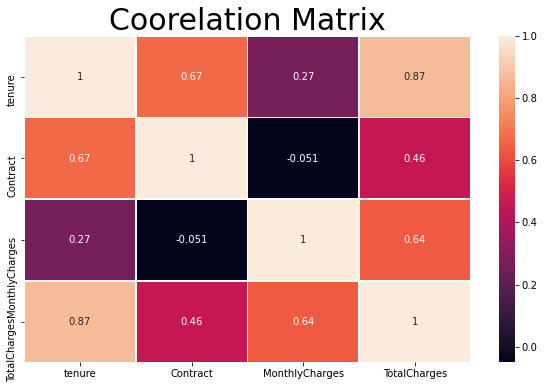

In [17]:
# Plot a correlation Matrix between top 4 features.
#The correlation matrix can be used to estimate the linear historical 
# relationship between the returns of multiple assets.
data1=data[['tenure','Contract','MonthlyCharges','TotalCharges']]
plt.subplots(figsize=(10, 6))
plt.title('Coorelation Matrix', size=30)
sns.heatmap(data1.corr(),annot=True,linewidths=0.5)

In [18]:
# Print top 5 arrays.
print(features[0:5,:])

[[   1    0  142   74]
 [  34    1  498 3624]
 [   2    0  436  536]
 [  45    1  266 3570]
 [   2    0  729  674]]


In [19]:
# It determine the way floating point numbers are displayed.
np.set_printoptions(precision=2) 

# It prints the score of each columns
# Here we can see the best features are Tenure, Contract, Monthly Charges 
# and Total Charges
print(fit.scores_)

[2.59e-01 1.34e+02 8.24e+01 1.33e+02 1.63e+04 9.73e-02 9.75e+00 9.82e+00
 5.52e+02 2.30e+02 1.91e+02 5.23e+02 7.49e+00 8.24e+00 1.12e+03 1.06e+02
 5.85e+01 7.95e+04 4.57e+05]


## Implement Machine Learning Models

### Applying Models on Unbalanced Class Data

In [20]:
#LOGISTIC
f1 = []
acc = []
n = 150
print("Logistic:")

# We use Logistic Regression to fit the data(X_train and Y_train) and use the 
# prediction on X_test and then find the F1 score and Accuracy with respect to
# Y_test.
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, Y_train)
    ypred=lr.predict(X_test)
    f1.append(f1_score(Y_test, ypred, average='weighted'))
    acc.append(accuracy_score(Y_test, ypred))
    
# Print the min,max and avg F1-score and Accuracy.    
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Logistic:
Avg F1-Score 0.7930706550626183
Max F1-Score 0.8165782210473341
Min F1-Score 0.7730496819789623
Avg Accuracy 0.8012241678498185
Max Accuracy 0.8206341694273545
Min Accuracy 0.7841930903928065


In [21]:
#RANDOM FOREST
n = 50
print("Random Forest:")

# We use Random Forest to fit the data(X_train and Y_train) and use the 
# prediction on X_test and then find the F1 score and Accuracy with respect to
# Y_test.
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, Y_train)
    ypred=rf.predict(X_test)
    f1.append(f1_score(Y_test, ypred, average='weighted'))
    acc.append(accuracy_score(Y_test, ypred))

# Print the min,max and avg F1-score and Accuracy. 
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.7898601395940449
Max F1-Score 0.8165782210473341
Min F1-Score 0.7517369752810782
Avg Accuracy 0.7983879626510262
Max Accuracy 0.8206341694273545
Min Accuracy 0.765791341376863


###  Our data is unbalanced hence balancing the data using Smote

In [22]:
# Splitting of the data in two part, Training and Testing Dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Displaying the dimension of Training and Testing data containing X that is 
# Features and Y which is Label.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (4930, 19)
Number transactions Y_train dataset:  (4930,)
Number transactions X_test dataset:  (2113, 19)
Number transactions Y_test dataset:  (2113,)


In [23]:
# Calling the Synthetic Minority Oversampling Technique Module.
from imblearn.over_sampling import SMOTE

# Finding the current balance of the Y_train.
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

# Balancing Y_train, so that the number of churn is equal to not churn.
sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())

# Printing the new DataFrame after OverSampling.
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

# Checking the Blance of the data after OverSampling
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 1316
Before OverSampling, counts of label '0': 3614 

After OverSampling, the shape of train_X: (7228, 19)
After OverSampling, the shape of train_y: (7228,) 

After OverSampling, counts of label '1': 3614
After OverSampling, counts of label '0': 3614


In [24]:
#LOGISTIC
n = 150
print("Logistic:")

# We use Logistic Regression to fit the data(X_train_res and Y_train_res) and 
# use the prediction on X_test and then find the F1 score and Accuracy with 
# respect to Y_test.
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    # Using the Balanced training set X_train_res and Y_train_res to fit the 
    # model.
    lr.fit(X_train_res, Y_train_res)
    y5pred=lr.predict(X_test)
    f1.append(f1_score(Y_test, y5pred, average='weighted'))
    acc.append(accuracy_score(Y_test, y5pred))
    
# Print the min,max and avg F1-score and Accuracy.     
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Logistic:
Avg F1-Score 0.7808878534690102
Max F1-Score 0.8165782210473341
Min F1-Score 0.7516848867012283
Avg Accuracy 0.7815654830860979
Max Accuracy 0.8206341694273545
Min Accuracy 0.7401798390913393


In [25]:
#NAIVE BAYES
n = 50
print("Naive Bayes:")

# We use Naives Bayes to fit the data(X_train_res and Y_train_res) and use 
# the prediction on X_test and then find the F1 score and Accuracy with 
# respect to Y_test.
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    nb = GaussianNB()
    # Using the Balanced training set X_train_res and Y_train_res to fit the 
    # model.
    nb.fit(X_train_res, Y_train_res)
    y2pred = nb.predict(X_test)
    f1.append(f1_score(Y_test, y2pred, average='weighted'))
    acc.append(accuracy_score(Y_test, y2pred))
    
# Print the min,max and avg F1-score and Accuracy. 
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Naive Bayes:
Avg F1-Score 0.7757575614281493
Max F1-Score 0.8165782210473341
Min F1-Score 0.7093899558895725
Avg Accuracy 0.7746309758408607
Max Accuracy 0.8206341694273545
Min Accuracy 0.6926898509581263


In [26]:
#MULTI LAYER PERCEPTION
n = 50
print("MLP:")

# We use Multi Layer Perception to fit the data(X_train_res and Y_train_res) 
# and use the prediction on X_test and then find the F1 score and Accuracy 
# with respect to Y_test.
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    clf = MLPClassifier(solver='sgd', alpha=0.00001, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
    # Using the Balanced training set X_train_res and Y_train_res to fit the 
    # model.
    clf.fit(X_train_res, Y_train_res)
    y3pred = clf.predict(X_test)
    f1.append(f1_score(Y_test, y3pred, average='weighted'))
    acc.append(accuracy_score(Y_test, y3pred))
    
# Print the min,max and avg F1-score and Accuracy. 
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

MLP:
Avg F1-Score 0.758392678122606
Max F1-Score 0.8165782210473341
Min F1-Score 0.5892264075955997
Avg Accuracy 0.7699519249016782
Max Accuracy 0.8206341694273545
Min Accuracy 0.6926898509581263


In [27]:
# NOW APPLYING RANDOM FOREST TO BALENCED CLASS DATA.
f1 = []
acc = []
n = 50
print("Random Forest:")

# We use Random Forest to fit the data(X_train_res and Y_train_res) and use 
# the prediction on X_test and then find the F1 score and Accuracy with 
# respect to Y_test.
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    # Using the Balanced training set X_train_res and Y_train_res to fit the 
    # model.
    rf.fit(X_train_res, Y_train_res)
    ypred=rf.predict(X_test)
    f1.append(f1_score(Y_test, ypred, average='weighted'))
    acc.append(accuracy_score(Y_test, ypred))
    
# Print the min,max and avg F1-score and Accuracy. 
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.9303943893606271
Max F1-Score 0.942538333466262
Min F1-Score 0.9145900345978697
Avg Accuracy 0.9302484031227821
Max Accuracy 0.9425124201561391
Min Accuracy 0.9141234918381831


## Model Evaluation

accuracy:   93.045
[[988  52]
 [ 46 323]]


Text(26.5, 0.5, 'true values')

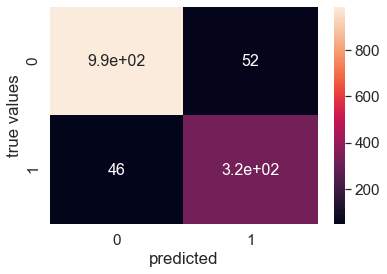

In [28]:
#RANDOM FOREST

#We find the accuracy of the Random Forest Model.
score = metrics.accuracy_score(Y_test, ypred)
print("accuracy:   %0.3f" % (score*100))

# Confusion matrix is used to evaluate the accuracy of a classification.
cm = metrics.confusion_matrix(Y_test, ypred, labels=[0,1])
print(cm)

# Plotting the Heatmap of the Confusion Matrix.
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})

#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

In [29]:
# Computing the Area Under the Receiver Operating Characteristic Curve 
# (ROC AUC) from prediction scores.
from sklearn.metrics import roc_auc_score

# The score is checked between Y_test and Y predicted.
auc = roc_auc_score(Y_test,ypred)
print('AUC: %.3f' % auc)

AUC: 0.913


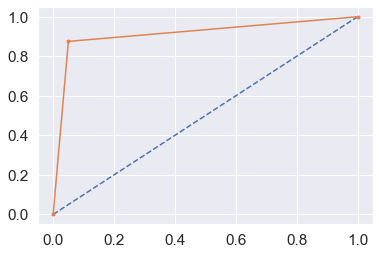

In [30]:
# Computing the Receiver operating characteristic (ROC)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, ypred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

## Final Conclusions

- I have used 4 classifiers for classification- Random Forest, Logistic Regression, Multi Layer Perception and Naive Bayes.
- Our data consist of unbalanced class.
- 79.83% accuracy score without balancing the data using Random Forest.
- After balancing the class using SMOTE we get much better results.
- Random Forest out performs all the models with 93.02% Accuracy & 0.913 AUC score.
- Accuracy can be further increased using parameter tuning.